## ANOVA (Analysis of Variance)

Önceki bölümde sorularımızı cevaplamak için Z-Distribution ve T-Distribution kullandık.

Sorularımız genelde "2 sample'ın(sub-grup) aynı populasyondan gelme olasılığı nedir?" şeklindeydi.

Z ve t Distributions şekil olarak aynı ama T distribution da sample sayısı az olduğu için peak noktası Z distribution'a göre biraz aşağıdadır.

<br>
<img src="a1.png" align = "left" style="width:500px;height:300px"/><br>

En tepedeki sivri uca peak noktası denir.

Mavi olan Z distribution, kırmızı olan T distribution'dur.

F_distribution yandaki şekilde görülen dağılımdır:

<br>
<img src="a2.png" align = "left" style="width:400px;height:300px"/>

F distribution ile "aynı variance'a sahip 2 sample'ın(sub-grup) aynı populasyondan gelme olasılığı nedir?" sorusunu cevaplayacağız yada "2'den fazla sample'ın(sub-grup) aynı populasyondan gelme olasılığı nedir?"

### ANOVA (Analysis of Variance) Nedir?

2 yada daha fazla grubumuz olduğu zaman kullanmayı tercih ederiz.

ANOVA bize grupların birbirinden farklı olup olmadığı bilgisini verir

Mesela Ortaokul, lise ve üniversite öğrencilerinin sınav kaygısı birbirinden farklı mı? sorusunun cevabını ANOVA ile vereceğiz.

Null hypothesis: sınav kaygıları aynı

Mesela bu sorunun cevabını bir data yaratarak bulmaya çalışalım.

Ortaokul, lise ve üniversite öğrencilerinin sınav kaygısı yüz üzerinden belli bir dağılımı sahip sayılar olsun

    ortaokul için mean = 47 ve std = 10 olan bir veri seti hazırlanacaktır.

    lise için mean = 48 ve std = 15 olan bir veri seti hazırlanacaktır.

    uni için mean = 55 ve std = 5 olan bir veri seti hazırlanacaktır.

total_mean = 50

ANOVA iki farklı variance'ı inceler:

    Variance Between groups: grup ortalamaları total mean'den ne kadar uzak

    Variance Within Groups: her bir değer grubun ortalamasından ne kadar uzak

F value bu iki variance arasındaki orandır yani (variance between groups) / (variance Within Groups)

ortaokul mean:  47.392423754
lise mean:  48.014473837
uni mean:  55.346929253000006
total mean:  50.25127561466667


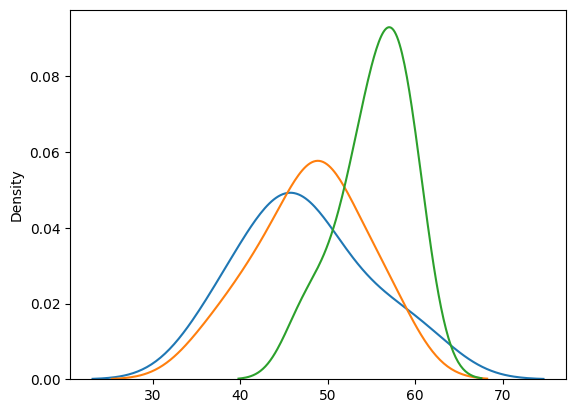

In [2]:
import numpy as np
ortaokul = np.array([51.36372405, 44.96944041, 49.43648441, 45.84584407, 45.76670682,
       56.04033356, 60.85163656, 39.16790361, 36.90132329, 43.58084076])
lise = np.array([56.65674765, 55.92724431, 42.32435143, 50.19137162, 48.91784081,
       48.11598035, 50.91298812, 47.46134988, 42.76947742, 36.86738678])
uni = np.array([60.03609029, 56.94733648, 57.77026852, 47.29851926, 54.21559389,
       57.74008243, 50.92416154, 53.47770749, 55.62968872, 59.42984391])
#
print("ortaokul mean: ",np.mean(ortaokul))
print("lise mean: ",np.mean(lise))
print("uni mean: ",np.mean(uni))
total_mean = (np.mean(ortaokul) + np.mean(lise) + np.mean(uni))/3
print("total mean: ",np.mean(total_mean))
# visualize with pdf
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(ortaokul)
sns.kdeplot(lise)
sns.kdeplot(uni)
plt.show()

F value'yi bulalım.

In [4]:
from scipy import stats
stats.f_oneway(ortaokul, lise, uni)

F_onewayResult(statistic=5.5230098837341215, pvalue=0.009755200989550988)

Çıktıdaki statistic=5.5230098837341215 kısmı F value'dir.

### F Distribution

Normal distribution gibi simetrik değildir. Aşağıdaki grafikte görüldüğü üzere sola yatıklık söz konusudur.

<br>
<img src="a3.png" align = "left" style="width:400px;height:200px"/>

F value < critical value ise null hypothesis'i reddedemiyoruz (fail to reject)

F value > critical value ise null hypothesis'i reddediyoruz (reject)

Critical value, yukarıdaki grafikte gördüğünüz F distribution içinde bulduğumuz noktadır.

Bu noktayı bulmak için şu işlemler yapılır:

degrees of freedom for groups: Number of groups - 1

    3 - 1 = 2

degrees of freedom for error: (number of rows - 1)* number of groups

    (10 - 1) * 3 = 27 
    
F value critical value'dan büyük olduğu için reject to null hypothesis

    5.5 (f-value) > 5.4 (critical value)
    
<br>
<img src="a4.png" align = "left" style="width:700px;height:600px"/>

Tablodan 27 ((10 - 1) * 3 = 27 ) değerine ait satırı buluyoruz. 2 (3 - 1 = 2) değerine ait sütunu buluyoruz. Kesişim 5.4881'dir.